In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text
from sqlalchemy.orm import declarative_base


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
# create connection
conn = engine.connect()


In [5]:
# Used Day 2 Activity 5 Reflection_Solution
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Understand Columnns and first row.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1491200b0>,
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08}

In [11]:
# Find the most recent date in the data set.
from sqlalchemy import desc
most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
    # Starting from the most recent data point in the database. 
    # Calculate the date one year from the last date in data set.
    # Perform a query to retrieve the data and precipitation scores
    # Save the query results as a Pandas DataFrame. Explicitly set the column names
    # Sort the dataframe by date
    # Use Pandas Plotting with Matplotlib to plot the data

In [13]:
# Used filter method from 10-Advance-SQL > 3 > Activities > 02_Ins_Date
# Starting from the most recent data point in the database. 
   # Most recent date from cell above is '2017-08-23'

# Calculate the date one year from the last date in data set.
twelve_months_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
twelve_months_ago


datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
start_date = dt.date(2016,8, 23)
end_date = dt.date(2017, 8, 23)

prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date, Measurement.date <= end_date).order_by(Measurement.date).all()

# for row in prcp_data:
    # print(f'Date: {row.date}, Precipitation: {row.prcp}')

In [15]:
import pandas as pd
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=['Date', 'Prcp Inches'])
print(prcp_df.head(10))

         Date  Prcp Inches
0  2016-08-23         0.00
1  2016-08-23         0.15
2  2016-08-23         0.05
3  2016-08-23          NaN
4  2016-08-23         0.02
5  2016-08-23         1.79
6  2016-08-23         0.70
7  2016-08-24         0.08
8  2016-08-24         2.15
9  2016-08-24         2.28


In [16]:
# Sort the dataframe by date (and drop NaN)
prcp_df = prcp_df.sort_values(by='Date').dropna()
print(prcp_df.head(10))

          Date  Prcp Inches
0   2016-08-23         0.00
1   2016-08-23         0.15
2   2016-08-23         0.05
4   2016-08-23         0.02
5   2016-08-23         1.79
6   2016-08-23         0.70
13  2016-08-24         1.45
12  2016-08-24         2.15
11  2016-08-24         1.22
8   2016-08-24         2.15


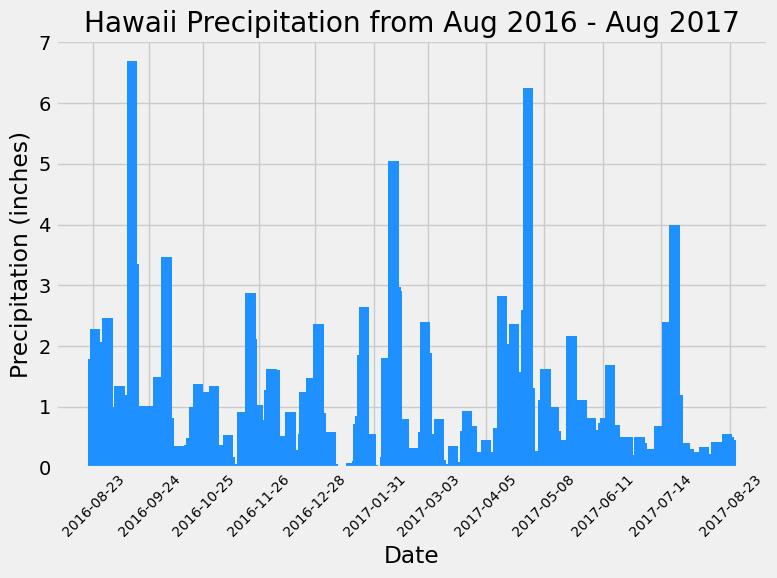

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

# Setup
plt.figure(figsize=(8, 6))
plt.bar(prcp_df['Date'], prcp_df['Prcp Inches'], color='dodgerblue', align='center', linewidth = 1, width=6)

# Labels & Aesthetics
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Hawaii Precipitation from Aug 2016 - Aug 2017')

# x label ticks
date_indices = np.linspace(0, len(prcp_df['Date']) - 1, 12, dtype=int)
plt.xticks(prcp_df['Date'].iloc[date_indices], rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = prcp_df.describe()
summary_statistics

,Prcp Inches
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
total_stations

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
 
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).scalar()

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).scalar()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).scalar()

print(f'Lowest Temp: {lowest_temp}, Highest Temp: {highest_temp}, Average Temp: {avg_temp}')


Lowest Temp: 54.0, Highest Temp: 85.0, Average Temp: 71.66378066378067


In [30]:
# Most recent date for most active station (mas)
most_recent_date_for_mas = session.query(Measurement.date).\
    filter(Measurement.station == most_active_station_id).\
    order_by(desc(Measurement.date)).first()
 
most_recent_date_for_mas

('2017-08-18',)

In [31]:
# 12 month date range for most active station (mas)
twelve_months_ago_mas = dt.date(2017,8,18) - dt.timedelta(days=365)
twelve_months_ago_mas

datetime.date(2016, 8, 18)

In [35]:
# Query the last 12 months of temperature observation data for this station 
start_date = dt.date(2016,8, 18)
end_date = dt.date(2017, 8, 18)

most_active_station_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id, 
           Measurement.date >= start_date, 
           Measurement.date <= end_date).\
    order_by(Measurement.date).all()

#most_active_station_data

In [36]:
# Convert data in a Pandas Dataframe for most active station (mas)
mas_df = pd.DataFrame(most_active_station_data, columns=['date', 'tobs'])
mas_df.head()

,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


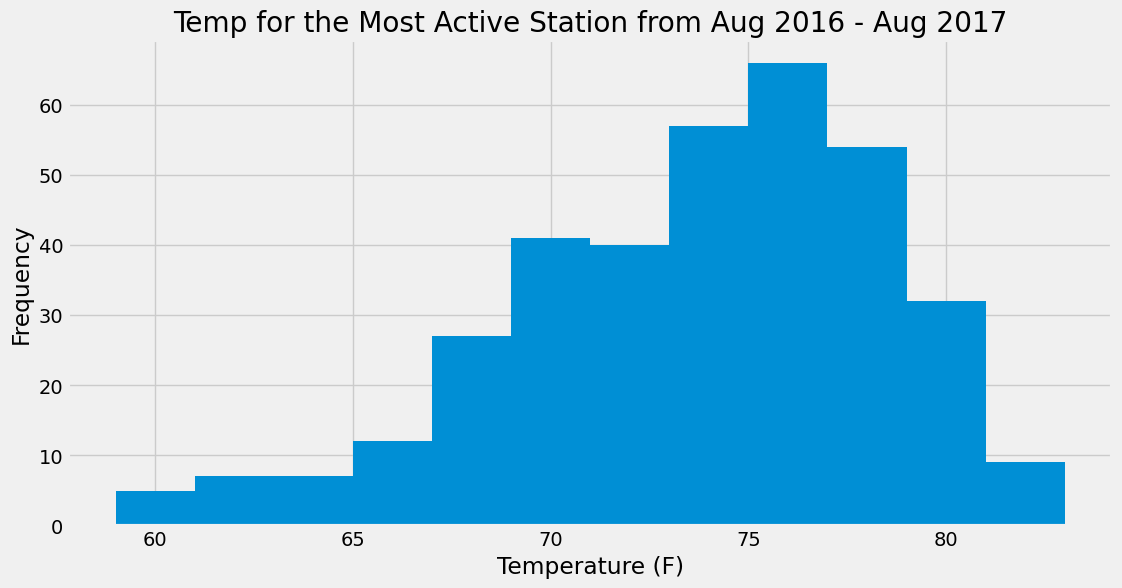

In [44]:
# Plot the results as a histogram
# Setup Plot
plt.figure(figsize=(12, 6))
plt.hist(mas_df['tobs'], bins=12,)

# Labels & Asthetics
plt.title('Temp for the Most Active Station from Aug 2016 - Aug 2017')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [45]:
# Close Session
session.close()